#  Uber Geospatial Analysis

This project analyzes Uber pickup data to uncover temporal and spatial patterns. The objective is to identify peak hours, high-demand days, and geographical pickup clusters using data visualization and geospatial mapping.

---


## Importing Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##  Loading the Dataset

In [2]:
import os

In [3]:
os.listdir(r"C:\Users\dimas\Downloads\Uber\Datasets")

['other-American_B01362.csv',
 'other-Carmel_B00256.csv',
 'other-Dial7_B00887.csv',
 'other-Diplo_B01196.csv',
 'other-Federal_02216.csv',
 'other-FHV-services_jan-aug-2015.csv',
 'other-Firstclass_B01536.csv',
 'other-Highclass_B01717.csv',
 'other-Lyft_B02510.csv',
 'other-Prestige_B01338.csv',
 'other-Skyline_B00111.csv',
 'Uber-Jan-Feb-FOIL.csv',
 'uber-raw-data-apr14.csv',
 'uber-raw-data-aug14.csv',
 'uber-raw-data-janjune-15.csv',
 'uber-raw-data-janjune-15_sample.csv',
 'uber-raw-data-jul14.csv',
 'uber-raw-data-jun14.csv',
 'uber-raw-data-may14.csv',
 'uber-raw-data-sep14.csv']

In [4]:
df = pd.read_csv(r"C:\Users\dimas\Downloads\Uber\Datasets\uber-raw-data-janjune-15_sample.csv")

In [5]:
df

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID
0,B02617,2015-05-02 21:43:00,B02764,237
1,B02682,2015-01-20 19:52:59,B02682,231
2,B02617,2015-03-19 20:26:00,B02617,161
3,B02764,2015-04-10 17:38:00,B02764,107
4,B02764,2015-03-23 07:03:00,B00111,140
...,...,...,...,...
99995,B02764,2015-04-13 16:12:00,B02764,234
99996,B02764,2015-03-06 21:32:00,B02764,24
99997,B02598,2015-03-19 19:56:00,B02598,17
99998,B02682,2015-05-02 16:02:00,B02682,68


In [6]:
df.shape

(100000, 4)

## Data Cleaning & Preprocessing

Steps:
- Check data types
- Handle missing values
- Remove duplicates


## Duplicated

In [7]:
type(df)

pandas.core.frame.DataFrame

In [8]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
99995    False
99996    False
99997    False
99998    False
99999    False
Length: 100000, dtype: bool

In [9]:
df.duplicated().sum()

np.int64(54)

In [10]:
df.drop_duplicates(inplace=True)

## Check

In [11]:
df.duplicated().sum()

np.int64(0)

In [12]:
df.shape

(99946, 4)

In [13]:
df.dtypes

Dispatching_base_num    object
Pickup_date             object
Affiliated_base_num     object
locationID               int64
dtype: object

## Change data type from string to date time

In [14]:
df['Pickup_date']

0        2015-05-02 21:43:00
1        2015-01-20 19:52:59
2        2015-03-19 20:26:00
3        2015-04-10 17:38:00
4        2015-03-23 07:03:00
                ...         
99995    2015-04-13 16:12:00
99996    2015-03-06 21:32:00
99997    2015-03-19 19:56:00
99998    2015-05-02 16:02:00
99999    2015-06-24 16:04:00
Name: Pickup_date, Length: 99946, dtype: object

In [15]:
df['Pickup_date'][0]

'2015-05-02 21:43:00'

In [16]:
df['Pickup_date'] = pd.to_datetime(df['Pickup_date'])

## Check

In [17]:
df.dtypes

Dispatching_base_num            object
Pickup_date             datetime64[ns]
Affiliated_base_num             object
locationID                       int64
dtype: object

## Missing Values

In [18]:
df.isnull()

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
99995,False,False,False,False
99996,False,False,False,False
99997,False,False,False,False
99998,False,False,False,False


In [19]:
df.isnull().sum()

Dispatching_base_num       0
Pickup_date                0
Affiliated_base_num     1116
locationID                 0
dtype: int64

In [20]:
df.dropna(inplace=True)

## Check

In [21]:
df.isnull().sum()

Dispatching_base_num    0
Pickup_date             0
Affiliated_base_num     0
locationID              0
dtype: int64

## Exploratory Data Analysis (EDA)

We'll explore patterns such as:
- Number of pickups by hour
- Number of pickups by day


# 1.. Which month have max. Uber pickups in New York City ?

In [22]:
df

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID
0,B02617,2015-05-02 21:43:00,B02764,237
1,B02682,2015-01-20 19:52:59,B02682,231
2,B02617,2015-03-19 20:26:00,B02617,161
3,B02764,2015-04-10 17:38:00,B02764,107
4,B02764,2015-03-23 07:03:00,B00111,140
...,...,...,...,...
99995,B02764,2015-04-13 16:12:00,B02764,234
99996,B02764,2015-03-06 21:32:00,B02764,24
99997,B02598,2015-03-19 19:56:00,B02598,17
99998,B02682,2015-05-02 16:02:00,B02682,68


### Extract Pickup date month

In [23]:
df['Pickup_date'].dt.month #dt is pandas shortcut of datetime

0        5
1        1
2        3
3        4
4        3
        ..
99995    4
99996    3
99997    3
99998    5
99999    6
Name: Pickup_date, Length: 98830, dtype: int32

In [24]:
df['Pickup_date'].dt.month_name()

0            May
1        January
2          March
3          April
4          March
          ...   
99995      April
99996      March
99997      March
99998        May
99999       June
Name: Pickup_date, Length: 98830, dtype: object

#### Make new columns and save the month

In [25]:
df['Month'] = df['Pickup_date'].dt.month_name()

### check

In [26]:
df

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID,Month
0,B02617,2015-05-02 21:43:00,B02764,237,May
1,B02682,2015-01-20 19:52:59,B02682,231,January
2,B02617,2015-03-19 20:26:00,B02617,161,March
3,B02764,2015-04-10 17:38:00,B02764,107,April
4,B02764,2015-03-23 07:03:00,B00111,140,March
...,...,...,...,...,...
99995,B02764,2015-04-13 16:12:00,B02764,234,April
99996,B02764,2015-03-06 21:32:00,B02764,24,March
99997,B02598,2015-03-19 19:56:00,B02598,17,March
99998,B02682,2015-05-02 16:02:00,B02682,68,May


<Axes: xlabel='Month'>

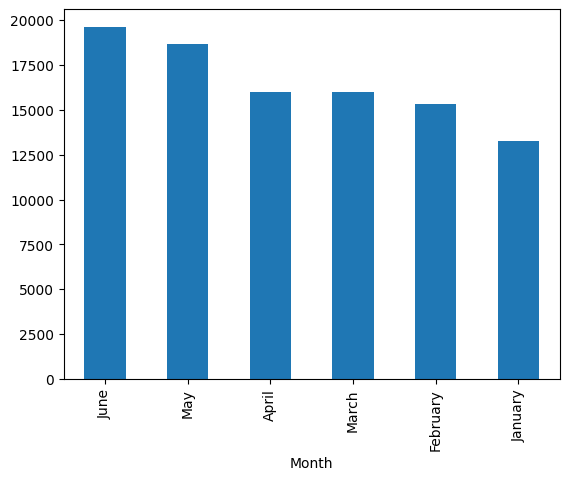

In [27]:
df['Month'].value_counts().plot(kind='bar')

<Axes: xlabel='Month'>

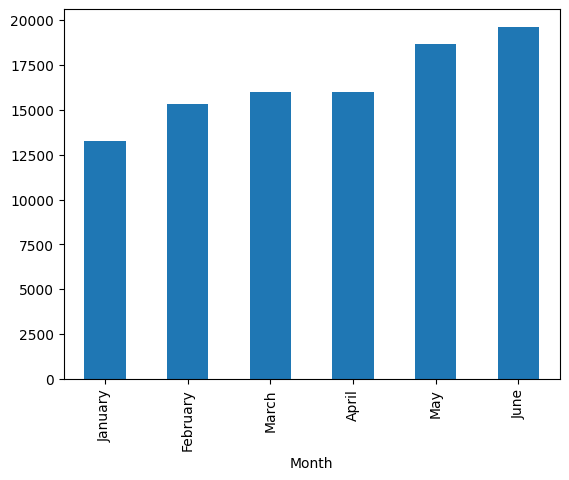

In [28]:
order = ['January', 'February', 'March', 'April', 'May', 'June']

df['Month'].value_counts().reindex(order).plot(kind='bar')

### Extract Pickup date day_name, day, hour, minute

In [29]:
df['day_name'] = df['Pickup_date'].dt.day_name()

df['day'] = df['Pickup_date'].dt.day

df['hour'] = df['Pickup_date'].dt.hour

df['minute'] = df['Pickup_date'].dt.minute


In [30]:
df.head()

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID,Month,day_name,day,hour,minute
0,B02617,2015-05-02 21:43:00,B02764,237,May,Saturday,2,21,43
1,B02682,2015-01-20 19:52:59,B02682,231,January,Tuesday,20,19,52
2,B02617,2015-03-19 20:26:00,B02617,161,March,Thursday,19,20,26
3,B02764,2015-04-10 17:38:00,B02764,107,April,Friday,10,17,38
4,B02764,2015-03-23 07:03:00,B00111,140,March,Monday,23,7,3


### Make Cross Tabulation with Pivot

In [31]:
pd.crosstab(index=df['Month'], columns=df['day_name'])

day_name,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
Month,,,,,,,
April,2365,1833,2508,2052,2823,1880,2521
February,2580,1907,2455,2095,2333,2043,1936
January,2414,1300,2614,1573,2287,1389,1673
June,2793,2848,3037,2485,2767,3187,2503
March,2465,2115,2522,2379,2093,2388,2007
May,3262,1865,3519,2944,2627,2115,2328


In [32]:
pivot = pd.crosstab(index=df['Month'], columns=df['day_name'])

In [33]:
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

In [34]:
pivot = pivot.reindex(index=order, columns=day_order)

<Axes: xlabel='Month'>

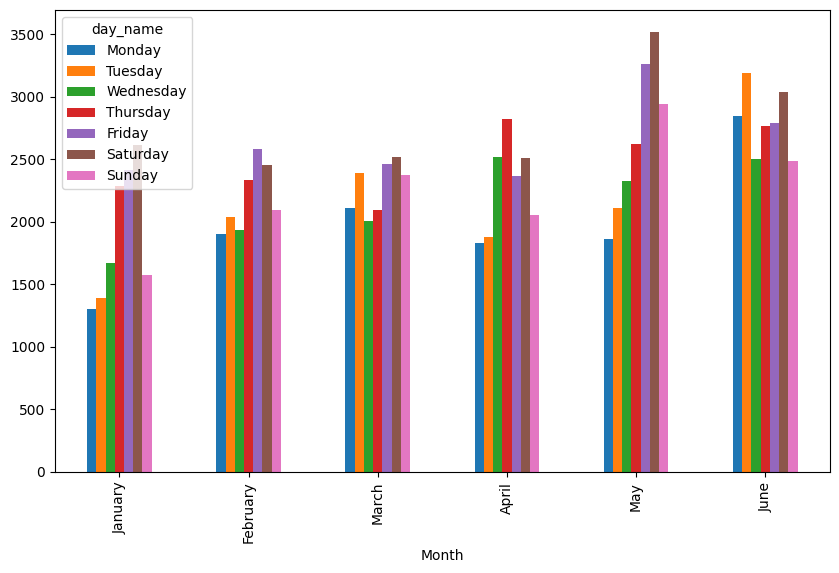

In [35]:
pivot.plot(kind='bar', figsize=(10,6))

# 2..  Find out Hourly Rush in New york city on all days

In [36]:
df.groupby(['day_name', 'hour'])

In [37]:
df.groupby(['day_name', 'hour']).size()

day_name   hour
Friday     0        576
           1        332
           2        194
           3        137
           4        158
                   ... 
Wednesday  19      1026
           20       893
           21       937
           22       890
           23       665
Length: 168, dtype: int64

In [38]:
Rush = df.groupby(['day_name', 'hour'], as_index=False).size()

In [39]:
Rush

,day_name,hour,size
0,Friday,0,576
1,Friday,1,332
2,Friday,2,194
3,Friday,3,137
4,Friday,4,158
...,...,...,...
163,Wednesday,19,1026
164,Wednesday,20,893
165,Wednesday,21,937
166,Wednesday,22,890


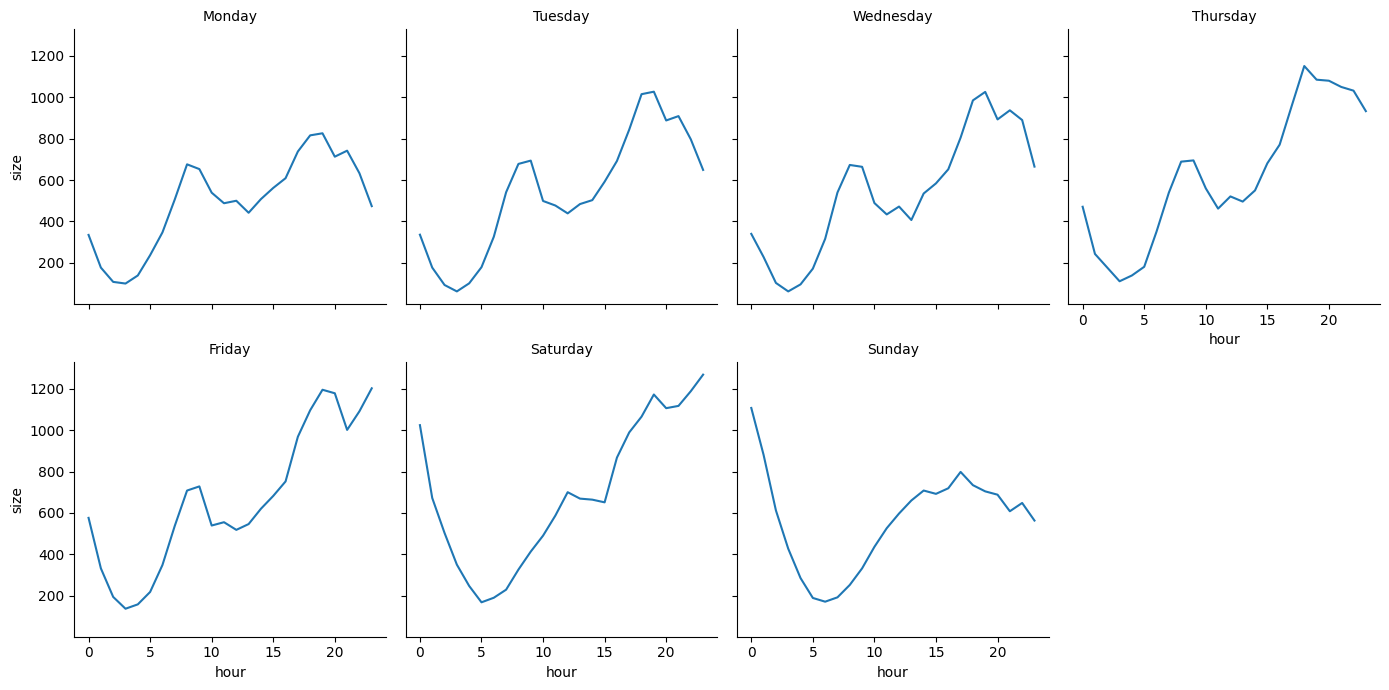

In [40]:
g = sns.FacetGrid(Rush, col='day_name', col_order=day_order, col_wrap=4, height=3.5)
g.map(sns.lineplot, 'hour', 'size')
g.set_titles('{col_name}')
plt.tight_layout()
plt.show()

#  Extract new data & Make it ready for the Data Analysis..

In [41]:
files = os.listdir(r"C:\Users\dimas\Downloads\Uber\Datasets")[-8:]

In [42]:
files.remove('uber-raw-data-janjune-15.csv')

In [43]:
files.remove('uber-raw-data-janjune-15_sample.csv')

In [44]:
files

['uber-raw-data-apr14.csv',
 'uber-raw-data-aug14.csv',
 'uber-raw-data-jul14.csv',
 'uber-raw-data-jun14.csv',
 'uber-raw-data-may14.csv',
 'uber-raw-data-sep14.csv']

In [45]:
final = pd.DataFrame()
path = r"C:\Users\dimas\Downloads\Uber\Datasets"

for file in files:
    current_df = pd.read_csv(path + '/' + file)
    final = pd.concat([current_df, final])


In [46]:
final.shape

(4534327, 4)

In [47]:
final.duplicated().sum()

np.int64(82581)

In [48]:
final.drop_duplicates(inplace=True)

In [49]:
final.shape

(4451746, 4)

In [50]:
final.head()

,Date/Time,Lat,Lon,Base
0,9/1/2014 0:01:00,40.2201,-74.0021,B02512
1,9/1/2014 0:01:00,40.7500,-74.0027,B02512
2,9/1/2014 0:03:00,40.7559,-73.9864,B02512
3,9/1/2014 0:06:00,40.7450,-73.9889,B02512
4,9/1/2014 0:11:00,40.8145,-73.9444,B02512


# 3.. at what locations of New York City we are getting rush ??

##### Base : The TLC base company code affiliated with the Uber pickup

    The Base codes are for the following Uber bases:
    B02512 : Unter
    B02598 : Hinter
    B02617 : Weiter
    B02682 : Schmecken
    B02764 : Danach-NY


In [51]:
rush_uber = final.groupby(['Lat' , 'Lon'] , as_index=False).size()

In [52]:
rush_uber

,Lat,Lon,size
0,39.6569,-74.2258,1
1,39.6686,-74.1607,1
2,39.7214,-74.2446,1
3,39.8416,-74.1512,1
4,39.9055,-74.0791,1
...,...,...,...
574553,41.3730,-72.9237,1
574554,41.3737,-73.7988,1
574555,41.5016,-72.8987,1
574556,41.5276,-72.7734,1


In [53]:
import folium

In [54]:
Basemap = folium.Map()

In [ ]:
Basemap

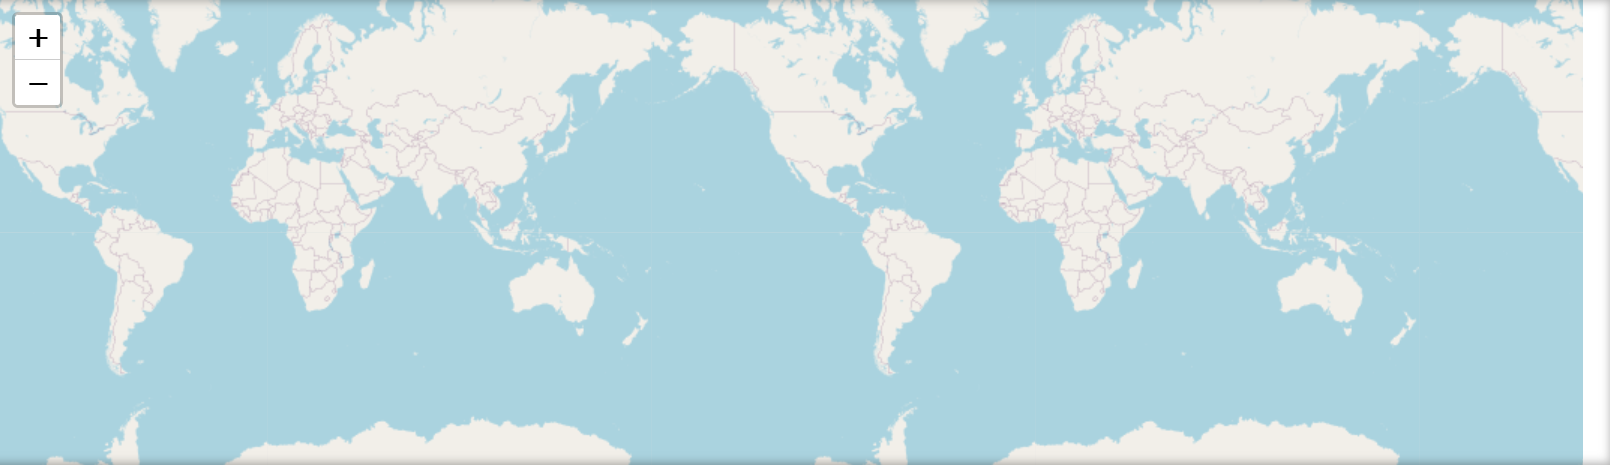

In [55]:
from folium.plugins import HeatMap

In [56]:
HeatMap(rush_uber).add_to(Basemap)

In [ ]:
Basemap

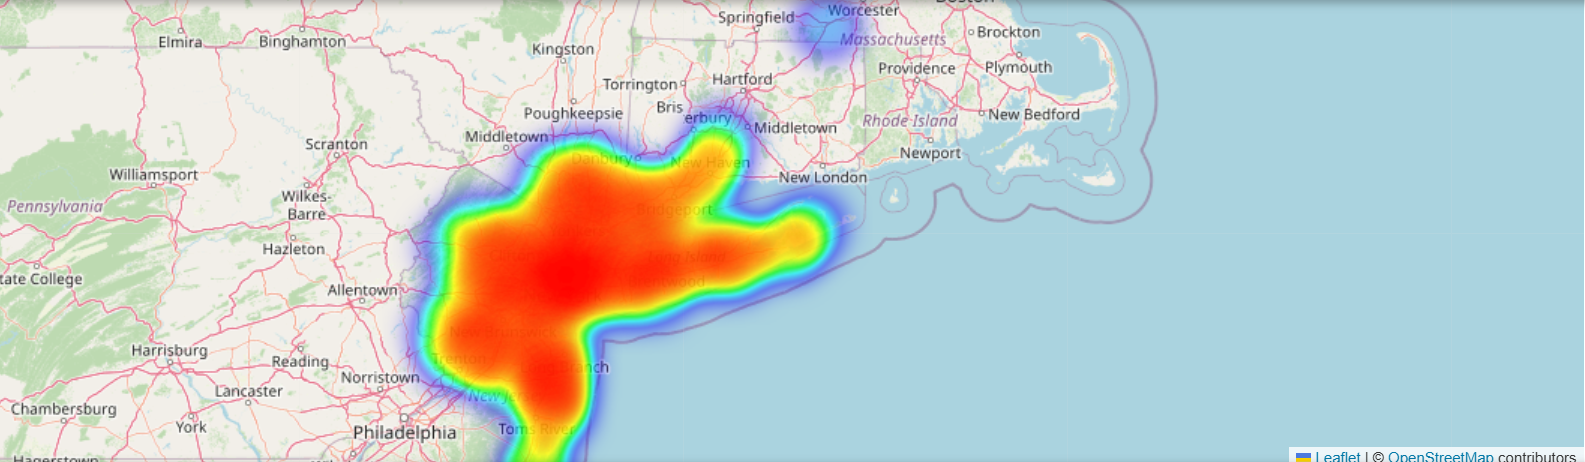

### 4. Examine rush on Hour and Weekday ( Perform Pair wise Analysis )

In [57]:
final.columns

Index(['Date/Time', 'Lat', 'Lon', 'Base'], dtype='object')

In [58]:
final.head()

,Date/Time,Lat,Lon,Base
0,9/1/2014 0:01:00,40.2201,-74.0021,B02512
1,9/1/2014 0:01:00,40.7500,-74.0027,B02512
2,9/1/2014 0:03:00,40.7559,-73.9864,B02512
3,9/1/2014 0:06:00,40.7450,-73.9889,B02512
4,9/1/2014 0:11:00,40.8145,-73.9444,B02512


In [59]:
final.dtypes

Date/Time     object
Lat          float64
Lon          float64
Base          object
dtype: object

In [71]:
final['Date/Time'][0]

0   2014-09-01 00:01:00
0   2014-05-01 00:02:00
0   2014-06-01 00:00:00
0   2014-07-01 00:03:00
0   2014-08-01 00:03:00
0   2014-04-01 00:11:00
Name: Date/Time, dtype: datetime64[ns]

In [72]:
### converting 'Date/Time' feature into date-time..

final['Date/Time'] = pd.to_datetime(final['Date/Time'] , format="%m/%d/%Y %H:%M:%S")

In [73]:
final['Date/Time'].dtype

dtype('<M8[ns]')

In [74]:
### extracting 'day' & 'hour' from 'Date/Time' feature..

final['day'] = final['Date/Time'].dt.day
final['hour'] = final['Date/Time'].dt.hour

In [75]:
final.head()

,Date/Time,Lat,Lon,Base,day,hour
0,2014-09-01 00:01:00,40.2201,-74.0021,B02512,1,0
1,2014-09-01 00:01:00,40.7500,-74.0027,B02512,1,0
2,2014-09-01 00:03:00,40.7559,-73.9864,B02512,1,0
3,2014-09-01 00:06:00,40.7450,-73.9889,B02512,1,0
4,2014-09-01 00:11:00,40.8145,-73.9444,B02512,1,0


In [76]:
pivot = final.groupby(['day' , 'hour']).size().unstack()

In [77]:
pivot

### pivot table is all about  , we have Rows*columns & having value in each cell !

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
day,,,,,,,,,,,,,,,,,,,,,
1,3178,1944,1256,1308,1429,2126,3664,5380,5292,4617,...,6933,7910,8633,9511,8604,8001,7315,7803,6268,4050
2,2435,1569,1087,1414,1876,2812,4920,6544,6310,4712,...,6904,8449,10109,11100,11123,9474,8759,8357,6998,5160
3,3354,2142,1407,1467,1550,2387,4241,5663,5386,4657,...,7226,8850,10314,10491,11239,9599,9026,8531,7142,4686
4,2897,1688,1199,1424,1696,2581,4592,6029,5704,4744,...,7158,8515,9492,10357,10259,9097,8358,8649,7706,5130
5,2733,1541,1030,1253,1617,2900,4814,6261,6469,5530,...,6955,8312,9609,10699,10170,9430,9354,9610,8853,6518
6,4537,2864,1864,1555,1551,2162,3642,4766,4942,4401,...,7235,8612,9444,9929,9263,8405,8117,8567,7852,5946
7,3645,2296,1507,1597,1763,2422,4102,5575,5376,4639,...,7276,8474,10393,11013,10573,9472,8691,8525,7194,4801
8,2830,1646,1123,1483,1889,3224,5431,7361,7357,5703,...,7240,8775,9851,10673,9687,8796,8604,8367,6795,4256
9,2657,1724,1222,1480,1871,3168,5802,7592,7519,5895,...,7877,9220,10270,11910,11449,9804,8909,8665,7499,5203


In [78]:
### styling dataframe

pivot.style.background_gradient()

hour,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
day,,,,,,,,,,,,,,,,,,,,,,,,
1,3178,1944,1256,1308,1429,2126,3664,5380,5292,4617,4607,4729,4930,5794,6933,7910,8633,9511,8604,8001,7315,7803,6268,4050
2,2435,1569,1087,1414,1876,2812,4920,6544,6310,4712,4797,4975,5188,5695,6904,8449,10109,11100,11123,9474,8759,8357,6998,5160
3,3354,2142,1407,1467,1550,2387,4241,5663,5386,4657,4788,5065,5384,6093,7226,8850,10314,10491,11239,9599,9026,8531,7142,4686
4,2897,1688,1199,1424,1696,2581,4592,6029,5704,4744,4743,4975,5193,6175,7158,8515,9492,10357,10259,9097,8358,8649,7706,5130
5,2733,1541,1030,1253,1617,2900,4814,6261,6469,5530,5141,5011,5047,5690,6955,8312,9609,10699,10170,9430,9354,9610,8853,6518
6,4537,2864,1864,1555,1551,2162,3642,4766,4942,4401,4801,5174,5426,6258,7235,8612,9444,9929,9263,8405,8117,8567,7852,5946
7,3645,2296,1507,1597,1763,2422,4102,5575,5376,4639,4905,5166,5364,6214,7276,8474,10393,11013,10573,9472,8691,8525,7194,4801
8,2830,1646,1123,1483,1889,3224,5431,7361,7357,5703,5288,5350,5483,6318,7240,8775,9851,10673,9687,8796,8604,8367,6795,4256
9,2657,1724,1222,1480,1871,3168,5802,7592,7519,5895,5406,5443,5496,6419,7877,9220,10270,11910,11449,9804,8909,8665,7499,5203


# Automate  Analysis

In [79]:
## creating a user-defined function..

def gen_pivot_table(df , col1 , col2):
    pivot = final.groupby([col1 , col2]).size().unstack()
    return pivot.style.background_gradient()

In [80]:
final.columns

Index(['Date/Time', 'Lat', 'Lon', 'Base', 'day', 'hour'], dtype='object')

In [82]:
gen_pivot_table(final , "day" , "hour")

hour,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
day,,,,,,,,,,,,,,,,,,,,,,,,
1,3178,1944,1256,1308,1429,2126,3664,5380,5292,4617,4607,4729,4930,5794,6933,7910,8633,9511,8604,8001,7315,7803,6268,4050
2,2435,1569,1087,1414,1876,2812,4920,6544,6310,4712,4797,4975,5188,5695,6904,8449,10109,11100,11123,9474,8759,8357,6998,5160
3,3354,2142,1407,1467,1550,2387,4241,5663,5386,4657,4788,5065,5384,6093,7226,8850,10314,10491,11239,9599,9026,8531,7142,4686
4,2897,1688,1199,1424,1696,2581,4592,6029,5704,4744,4743,4975,5193,6175,7158,8515,9492,10357,10259,9097,8358,8649,7706,5130
5,2733,1541,1030,1253,1617,2900,4814,6261,6469,5530,5141,5011,5047,5690,6955,8312,9609,10699,10170,9430,9354,9610,8853,6518
6,4537,2864,1864,1555,1551,2162,3642,4766,4942,4401,4801,5174,5426,6258,7235,8612,9444,9929,9263,8405,8117,8567,7852,5946
7,3645,2296,1507,1597,1763,2422,4102,5575,5376,4639,4905,5166,5364,6214,7276,8474,10393,11013,10573,9472,8691,8525,7194,4801
8,2830,1646,1123,1483,1889,3224,5431,7361,7357,5703,5288,5350,5483,6318,7240,8775,9851,10673,9687,8796,8604,8367,6795,4256
9,2657,1724,1222,1480,1871,3168,5802,7592,7519,5895,5406,5443,5496,6419,7877,9220,10270,11910,11449,9804,8909,8665,7499,5203


# Key Insights

### Monthly Pickup Trends

* The highest number of Uber pickups occurred in May and June.

* Ride demand tends to increase during warmer months.

### Daily & Hourly Patterns

* Fridays and Saturdays had the highest pickup volumes.

* Rush hours typically occur between 5 PM and 7 PM.

### Geospatial Distribution

* The majority of pickups were concentrated in downtown Manhattan.

* This suggests high demand in commercial and tourist-heavy zones.

#  Conclusion

This analysis reveals that Uber ride demand is time- and location-sensitive. Peak usage occurs during weekday evenings and weekends, with hotspots centered in Manhattan. These insights can support:

* Driver allocation strategies to meet demand more efficiently.

* Targeted marketing or promotions based on high-demand times and areas.

* Data-driven business decisions using temporal and geospatial analysis.

